In [2]:
import pandas as pd 
import numpy as np 
import tensorflow as tf
from tensorflow import keras 
data = pd.read_csv('emails.csv') # 데이터셋 로드
data.head() 

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [3]:
data.info() # 데이터 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [4]:
data=data.drop(columns="Email No.") # 필요없는 컬럼 제거
data

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


In [5]:
data['Prediction'].value_counts() # 1은 spam

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [6]:
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [7]:
from sklearn.model_selection import train_test_split # 트레이닝셋, 밸리데이션 셋, 테스트 셋 나누기

x = data.drop('Prediction', axis=1)
y = data['Prediction']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#validation 데이터셋 생성
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

#텐서플로우를 사용하기에, 데이터형 변환을 해줘야 한다.
x_train_f = tf.convert_to_tensor(x_train, dtype=tf.float64)
x_test_f = tf.convert_to_tensor(x_test, dtype=tf.float64)
y_train_f = tf.convert_to_tensor(y_train, dtype=tf.float64)
y_test_f = tf.convert_to_tensor(y_test, dtype=tf.float64)
x_val_f = tf.convert_to_tensor(x_val, dtype=tf.float64)
y_val_f = tf.convert_to_tensor(y_val, dtype=tf.float64)

In [8]:
# 랜덤포레스트 시작
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 인스턴스 생성
model_RF = RandomForestClassifier(n_estimators=500,oob_score=True,random_state=42, n_jobs=-1)
model_RF.fit(x_train, y_train)

importance = model_RF.feature_importances_ # 피처 비중
print(importance)
sorted_indices = np.argsort(importance)[::-1]
# 상위 N개의 피처 출력
top_n_features = 5
selected_features = sorted_indices[:top_n_features]

print("Top", top_n_features, "Features:") 
for idx in selected_features:
    print(f"Feature {idx} : {data.columns[idx]} Importance = {importance[idx]}")
y_pred_RF = model_RF.predict(x_val)

[7.04878363e-03 2.58761705e-03 2.57278499e-03 ... 2.53353836e-05
 2.46974830e-03 2.32783319e-05]
Top 5 Features:
Feature 13 : enron Importance = 0.020744369574153994
Feature 92 : http Importance = 0.014999759014352231
Feature 916 : ali Importance = 0.013810643366442199
Feature 37 : hpl Importance = 0.012780638369972612
Feature 418 : hanks Importance = 0.011081575494796355


In [9]:
# MLP 시작
model_MLP = keras.models.Sequential([
    keras.layers.Input(3000), #input layer
    keras.layers.Dense(1800, activation = "relu"),
    keras.layers.Dense(700, activation = "relu"),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(50, activation = "relu"),
    keras.layers.Dense(1, activation="sigmoid") #binary classifier이기 때문에 sigmoid로 설정, 다중분류는 softmax
])
model_MLP.built

model_MLP.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1800)              5401800   
                                                                 
 dense_1 (Dense)             (None, 700)               1260700   
                                                                 
 dense_2 (Dense)             (None, 300)               210300    
                                                                 
 dense_3 (Dense)             (None, 100)               30100     
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6908001 (26.35 MB)
Trainable params: 69080

In [10]:
# MLP 컴파일
model_MLP.compile(loss = "binary_crossentropy",
              optimizer = "Adam",  #sgd 사용했는데 성능이 별로 안좋아서, adam 사용
              metrics=["accuracy"])
history = model_MLP.fit(x_train_f, y_train_f, epochs=10,
                    validation_data=(x_val_f, y_val_f))

Epoch 1/10
91/91 [==============================] - 2s 16ms/step - loss: 0.7382 - accuracy: 0.8149 - val_loss: 0.2226 - val_accuracy: 0.9436
Epoch 2/10
91/91 [==============================] - 1s 14ms/step - loss: 0.3079 - accuracy: 0.9185 - val_loss: 0.2639 - val_accuracy: 0.9364
Epoch 3/10
91/91 [==============================] - 1s 14ms/step - loss: 0.1047 - accuracy: 0.9724 - val_loss: 0.4172 - val_accuracy: 0.9710
Epoch 4/10
91/91 [==============================] - 1s 14ms/step - loss: 0.0730 - accuracy: 0.9803 - val_loss: 0.0716 - val_accuracy: 0.9815
Epoch 5/10
91/91 [==============================] - 1s 15ms/step - loss: 0.1096 - accuracy: 0.9862 - val_loss: 0.8112 - val_accuracy: 0.8422
Epoch 6/10
91/91 [==============================] - 1s 15ms/step - loss: 0.0602 - accuracy: 0.9796 - val_loss: 0.8386 - val_accuracy: 0.9702
Epoch 7/10
91/91 [==============================] - 1s 16ms/step - loss: 0.0225 - accuracy: 0.9934 - val_loss: 0.0900 - val_accuracy: 0.9823
Epoch 8/10
91

In [11]:
# 모델 평가
val_loss, val_accuracy = model_MLP.evaluate(x_val_f, y_val_f)
# 밸리데이션
print(f"val Loss: {val_loss}")
print(f"val Accuracy: {val_accuracy}")
y_pred_f_MLP = model_MLP.predict(x_val_f)
y_pred_f_binary = (y_pred_f_MLP > 0.5).astype(int)  # 이진 분류의 경우 임계값을 선택하여 이진화

39/39 [==============================] - 0s 4ms/step - loss: 0.1906 - accuracy: 0.9807
val Loss: 0.19062013924121857
val Accuracy: 0.9806763529777527
39/39 [==============================] - 0s 4ms/step


In [12]:
# SVM 시작
from sklearn.svm import SVC
model_SVM = SVC(kernel='linear')
model_SVM_nonlinear = SVC(kernel='poly', degree=3)

model_SVM.fit(x_train, y_train)
model_SVM_nonlinear.fit(x_train, y_train)

# 밸리데이션용 데이터 예측
y_pred_SVM = model_SVM.predict(x_val)
y_pred_SVM_nonlinear = model_SVM_nonlinear.predict(x_val)

In [13]:
# 나이브 베이즈 시작
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
model_gnb = GaussianNB()
model_mnb = MultinomialNB()
model_bnb = BernoulliNB()
model_cnb = ComplementNB()

#모델학습
model_gnb.fit(x_train,y_train)
model_mnb.fit(x_train,y_train)
model_bnb.fit(x_train,y_train)
model_cnb.fit(x_train, y_train)   

#테스트용 데이터에 대한 예측
y_pred_Ber = model_bnb.predict(x_val)
y_pred_Com = model_cnb.predict(x_val)
y_pred_Gau = model_gnb.predict(x_val)
y_pred_Mul = model_mnb.predict(x_val)

In [19]:
# Measure
from sklearn.metrics import accuracy_score, confusion_matrix
modellist = ["RandomForest", "MLP_binary","SVM", "SVM_nonlinear", "Ber", "Com","Gau","Mul"]
accuracylist = []
# 정확도 계산
accuracylist.append(accuracy_score(y_val, y_pred_RF))
accuracylist.append(accuracy_score(y_val_f, y_pred_f_binary))
accuracylist.append(accuracy_score(y_val, y_pred_SVM))
accuracylist.append(accuracy_score(y_val, y_pred_SVM_nonlinear))
accuracylist.append(accuracy_score(y_val, y_pred_Ber))
accuracylist.append(accuracy_score(y_val, y_pred_Com))
accuracylist.append(accuracy_score(y_val, y_pred_Gau))
accuracylist.append(accuracy_score(y_val, y_pred_Mul))
print("accuracy")
for accuracy, model in zip(accuracylist, modellist):
    print(f"{model}의 정확도: {accuracy}")

# 혼동 행렬 계산
confusionlist = []
confusionlist.append(confusion_matrix(y_val, y_pred_RF))
confusionlist.append(confusion_matrix(y_val_f, y_pred_f_binary))
confusionlist.append(confusion_matrix(y_val, y_pred_SVM))
confusionlist.append(confusion_matrix(y_val, y_pred_SVM_nonlinear))
confusionlist.append(confusion_matrix(y_val, y_pred_Ber))
confusionlist.append(confusion_matrix(y_val, y_pred_Com))
confusionlist.append(confusion_matrix(y_val, y_pred_Gau))
confusionlist.append(confusion_matrix(y_val, y_pred_Mul))
print("confusion_matrix")
for confusion, model in zip(confusionlist, modellist):
    print(f"{model}의 혼동 행렬:\n {confusion}")

accuracy
RandomForest의 정확도: 0.9726247987117552
MLP_binary의 정확도: 0.9806763285024155
SVM의 정확도: 0.9629629629629629
SVM_nonlinear의 정확도: 0.750402576489533
Ber의 정확도: 0.8711755233494364
Com의 정확도: 0.9371980676328503
Gau의 정확도: 0.9541062801932367
Mul의 정확도: 0.9347826086956522
confusion_matrix
RandomForest의 혼동 행렬:
 [[863  16]
 [ 18 345]]
MLP_binary의 혼동 행렬:
 [[862  17]
 [  7 356]]
SVM의 혼동 행렬:
 [[853  26]
 [ 20 343]]
SVM_nonlinear의 혼동 행렬:
 [[869  10]
 [300  63]]
Ber의 혼동 행렬:
 [[803  76]
 [ 84 279]]
Com의 혼동 행렬:
 [[815  64]
 [ 14 349]]
Gau의 혼동 행렬:
 [[834  45]
 [ 12 351]]
Mul의 혼동 행렬:
 [[817  62]
 [ 19 344]]


/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 54072 (\N{HANGUL SYLLABLE PAEM}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current fon

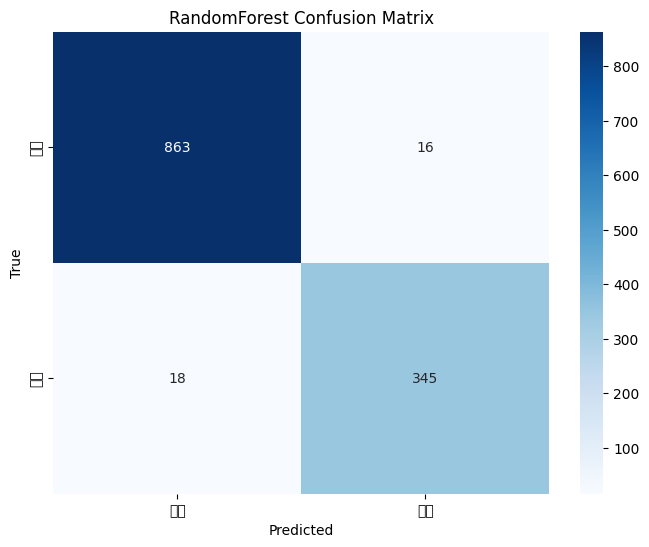

/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 54072 (\N{HANGUL SYLLABLE PAEM}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current fon

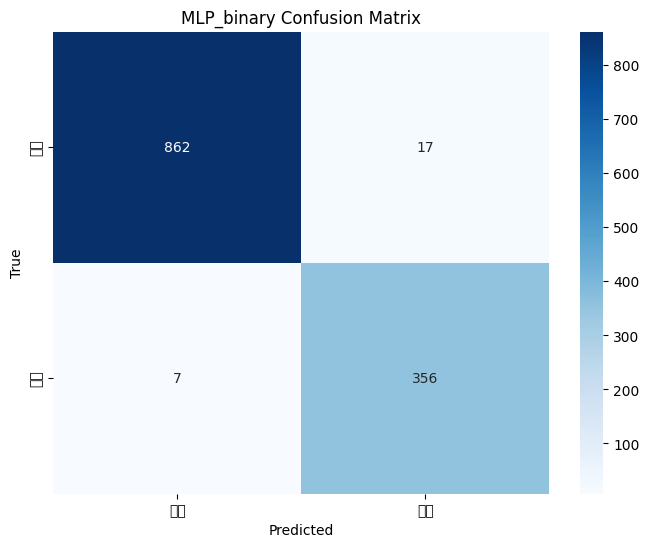

/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 54072 (\N{HANGUL SYLLABLE PAEM}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current fon

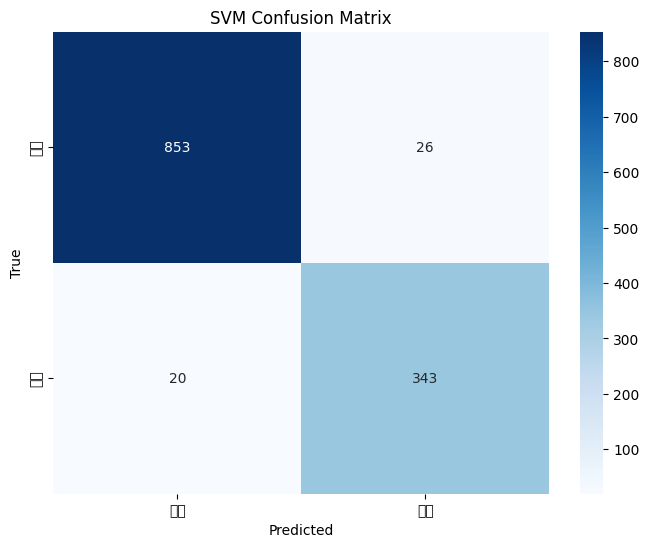

/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 54072 (\N{HANGUL SYLLABLE PAEM}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current fon

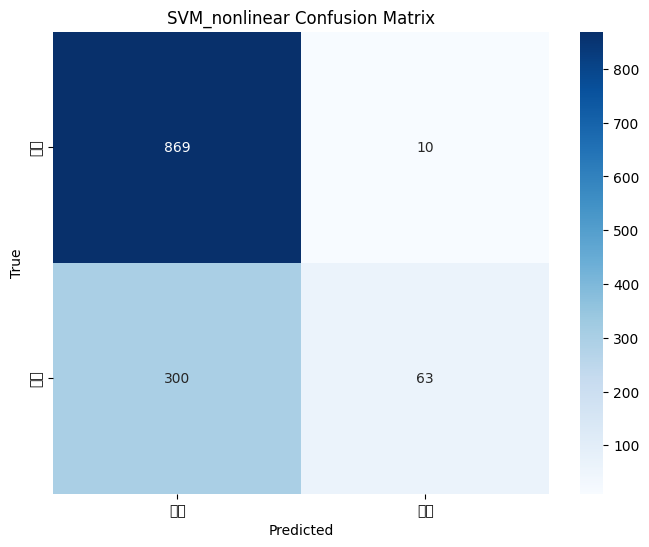

/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 54072 (\N{HANGUL SYLLABLE PAEM}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current fon

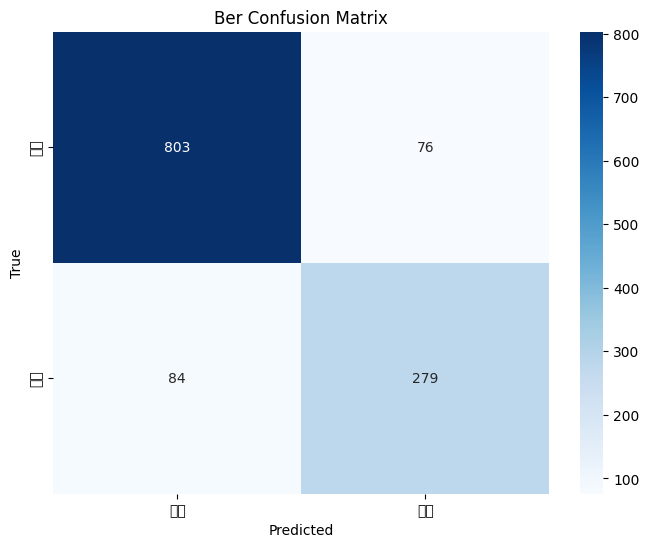

/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 54072 (\N{HANGUL SYLLABLE PAEM}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current fon

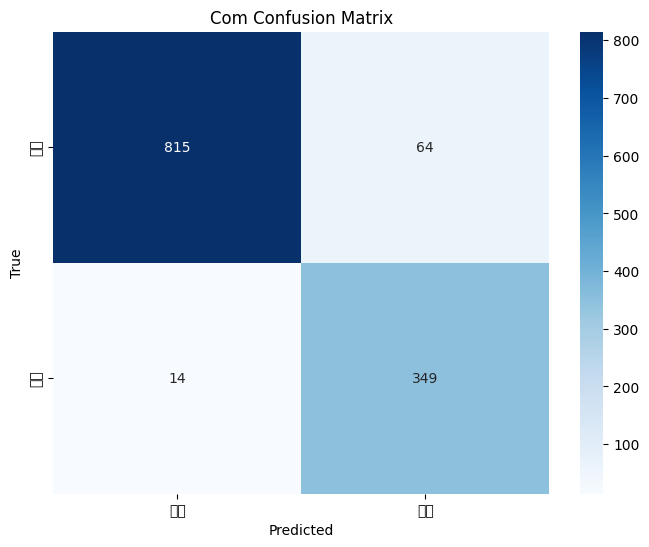

/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 54072 (\N{HANGUL SYLLABLE PAEM}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current fon

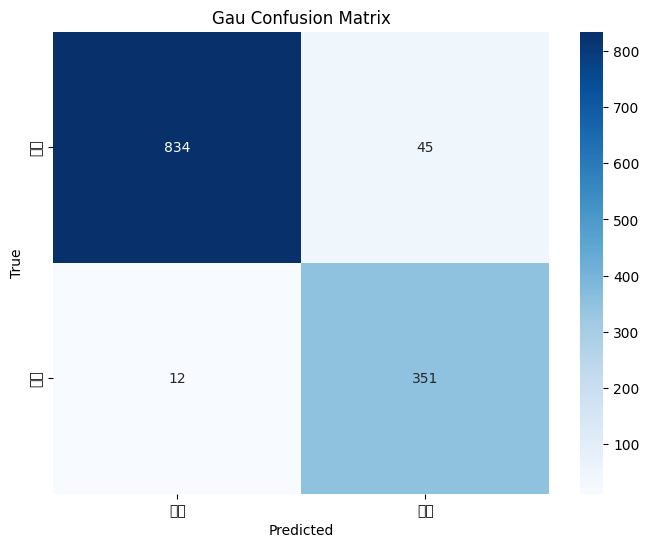

/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 54072 (\N{HANGUL SYLLABLE PAEM}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current fon

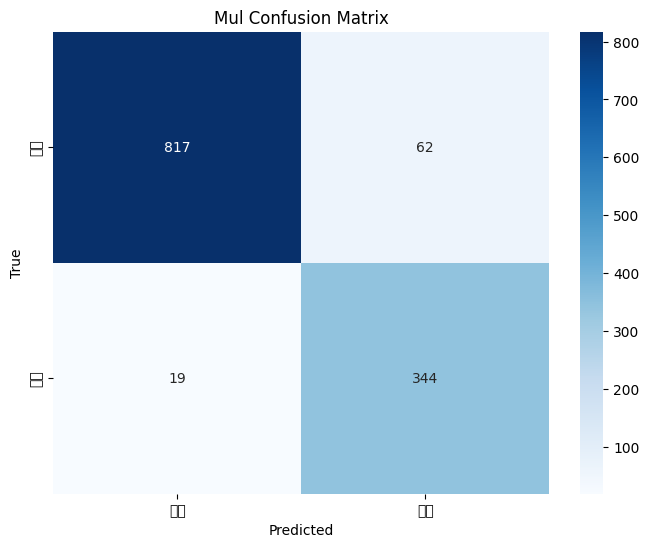

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 혼동 행렬 시각화
for confusion, model in zip(confusionlist, modellist):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['정상', '스팸'], yticklabels=['정상', '스팸'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(model + ' Confusion Matrix')
    plt.show()

In [16]:
# Precion, Recall, F1 score 계산
from sklearn.metrics import precision_score, recall_score, f1_score
def PRF1(modelString, modelypred):
    precision = precision_score(y_val, modelypred)
    recall = recall_score(y_val, modelypred)
    f1 = f1_score(y_val, modelypred)
    print(modelString+"의")
    print(f"Precision: {precision:.2f}",end=" ")
    print(f"Recall: {recall:.2f}",end=" ")
    print(f"F1 Score: {f1:.2f}")
    print()
PRF1("RandomForest", y_pred_RF)
PRF1("MLP_binary", y_pred_f_binary)
PRF1("SVM", y_pred_SVM)
PRF1("SVM_nonlinear", y_pred_SVM_nonlinear)
PRF1("Ber", y_pred_Ber)
PRF1("Com", y_pred_Com)
PRF1("Gau", y_pred_Gau)
PRF1("Mul", y_pred_Mul)



RandomForest의
Precision: 0.96 Recall: 0.95 F1 Score: 0.95

MLP_binary의
Precision: 0.95 Recall: 0.98 F1 Score: 0.97

SVM의
Precision: 0.93 Recall: 0.94 F1 Score: 0.94

SVM_nonlinear의
Precision: 0.86 Recall: 0.17 F1 Score: 0.29

Ber의
Precision: 0.79 Recall: 0.77 F1 Score: 0.78

Com의
Precision: 0.85 Recall: 0.96 F1 Score: 0.90

Gau의
Precision: 0.89 Recall: 0.97 F1 Score: 0.92

Mul의
Precision: 0.85 Recall: 0.95 F1 Score: 0.89



In [17]:
# 가장 강한 모델 MLP의 최종 테스트
def PRF1_test(modelString, modelypred):
    precision = precision_score(y_test, modelypred)
    recall = recall_score(y_test, modelypred)
    f1 = f1_score(y_test, modelypred)
    print(modelString+"의")
    print(f"Precision: {precision:.2f}",end=" ")
    print(f"Recall: {recall:.2f}",end=" ")
    print(f"F1 Score: {f1:.2f}")
    print()
# 모델 평가
test_loss, test_accuracy = model_MLP.evaluate(x_test_f, y_test_f)

print(f"test Loss: {test_loss}")
print(f"test Accuracy: {test_accuracy}")
y_pred_f_MLP_test = model_MLP.predict(x_test_f)
y_pred_f_binary_test = (y_pred_f_MLP_test > 0.5).astype(int)
PRF1_test("최종 모델 MLP", y_pred_f_binary_test)

33/33 [==============================] - 0s 4ms/step - loss: 0.1489 - accuracy: 0.9826
test Loss: 0.14888407289981842
test Accuracy: 0.9826086759567261
33/33 [==============================] - 0s 4ms/step
최종 모델 MLP의
Precision: 0.96 Recall: 0.98 F1 Score: 0.97

